<a href="https://colab.research.google.com/github/TharikH/deep-learning/blob/main/dl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
num_train_samples = X_train.shape[0]
num_size = X_train.shape[1] * X_train.shape[2]
num_test_samples = X_test.shape[0]

In [4]:
num_size

784

plot 1 sample image for each class

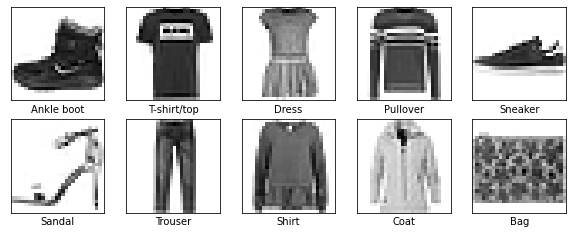

In [5]:
d=set()
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
k=0
for i in range(num_train_samples):
  if Y_train[i] not in d:
    d.add(Y_train[i])
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
    k+=1
    if k == 10:
      break

plt.show()


In [6]:
#parameters 



In [7]:
#class having all required activations

class Activations():
  def __init__(self):
    self.activation_dict={
        "sigmoid":self.sigmoid,
        "softmax":self.softmax
    }

  def activate(self, activation_function = "sigmoid"):
    return self.activation_dict[activation_function]

  def sigmoid(self, x):
    z = 1/(1 + np.exp(x))
    return z

  def softmax(self, x):
    max_element = max(x)
    z = np.exp(x - max_element)
    total = sum(z)
    z = z/total
    return z

In [42]:
class WeightInit():
  def __init__(self):
    pass
  
  def zeroInit(self, shape):
    x = np.zeros(shape)
    return x

  def randomInit(self, shape):
    x = np.random.rand(*shape)
    return x
  
  def xavierInit():
    pass


In [43]:
# Base class for all neural networks
class NeuralNetwork():
  def __init__(self):
    pass
  def getParameters(self):
    pass
  def feedforward():
    pass
  def backpropogation():
    pass
  def test(self):
    pass
  def train(self):
    pass


In [44]:
# Neural Network for this particular neural network
class NN(NeuralNetwork):
  def __init__(self, num_samples = 100, input_size = 784, output_size = 10, num_hidden_layer = 3, hidden_layer_size=np.array([4, 4, 4]), data_name = "Fashion_mnsit", hidden_layer_activation="sigmoid", output_layer_activation="softmax"):
    self.num_samples = num_samples
    self.input_size = input_size
    self.output_size = output_size
    self.num_hidden_layer = num_hidden_layer
    self.hidden_layer_size = hidden_layer_size
    self.W, self.b = self.initializeWeights()
    self.hidden_layer_activation = hidden_layer_activation
    self.output_layer_activation = output_layer_activation
    self.activation_function = Activations()
    self.activate_hidden = self.activation_function.activate(hidden_layer_activation)
    self.activate_output = self.activation_function.activate(output_layer_activation)
    self.parameters = {
        "data_name":data_name,
        "num_samples":num_samples,
        "input_size":input_size,
        "output_size":output_size,
        "num_hidden_layer":num_hidden_layer,
        "hidden_layer_size":hidden_layer_size,
        "hidden_layer_activation":hidden_layer_activation,
        "output_layer_activation":output_layer_activation
    }

  def getParameters(self):
    return self.parameters

  def initializeWeights(self):
    W = []
    b= []
    input_size = self.input_size
    weight_init = WeightInit()
    for i in range(self.num_hidden_layer):
      output_size = self.hidden_layer_size[i]
      W.append(weight_init.randomInit((input_size, output_size )))
      b.append(weight_init.randomInit((output_size, 1 )))
      input_size = output_size
    
    output_size = self.output_size

    W.append(weight_init.randomInit((input_size, output_size )))
    b.append(weight_init.randomInit((output_size, 1 )))

    return W, b


  def feedforward(self, x):
    hidden_layer_input = self.activate_hidden(self.W[0].T @ x + self.b[0])

    for i in range(1,self.num_hidden_layer):
      hidden_layer_output=self.activate_hidden(self.W[i].T @ hidden_layer_input + self.b[i])
      hidden_layer_input = hidden_layer_output

    output = self.activate_output(self.W[self.num_hidden_layer].T @ hidden_layer_input + self.b[self.num_hidden_layer])

    return output

  def backpropogation(self, x, y):

    pass
  

In [45]:
nn = NN()
x = X_train[1].reshape(784,1)
# print(x)
a=nn.feedforward(x/255);
print(a,Y_train[1])


[[0.13274099]
 [0.09028463]
 [0.15310322]
 [0.12623015]
 [0.06461673]
 [0.07307223]
 [0.05924532]
 [0.09683001]
 [0.08288793]
 [0.1209888 ]] 0


In [39]:
[[0.10539113]
 [0.08926113]
 [0.0888939 ]
 [0.12474406]
 [0.12139945]
 [0.07945756]
 [0.07704813]
 [0.16081162]
 [0.09699479]
 [0.05599822]] 9


SyntaxError: ignored